In [63]:
%matplotlib inline

# Day 0014 - 10 minutes to Pandas
# - 1000 days of Python 

# Setup working directory

In [211]:
pwd

'D:\\DoTWA_Data\\FR201410_NoSBET_Q2\\fr_1014\\Tide\\TideData'

In [212]:
cd D:\DoTWA_Data\FR201410_NoSBET_Q2\fr_1014\Tide\TideData

D:\DoTWA_Data\FR201410_NoSBET_Q2\fr_1014\Tide\TideData


In [213]:
pwd

'D:\\DoTWA_Data\\FR201410_NoSBET_Q2\\fr_1014\\Tide\\TideData'

## Import Libraries

In [214]:
import numpy as np
import pandas as pd

# Object creation

## Creating a Series by passing a list of values, letting pandas create a default integer index:

In [215]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## Create a data frame with a numpy array and some column names

In [216]:
import numpy as np
df = pd.DataFrame(np.random.randn(6,4), index=['Jenny', 'Frank', 'Wenfai', 'Arun', 'Mary', 'Ivan'],columns=list("ABCD"))
df

,A,B,C,D
Jenny,0.370047,-0.887417,1.087379,-0.676531
Frank,-0.087993,-1.625819,-0.198183,0.223510
Wenfai,-0.782452,-1.885065,-1.190821,-1.547143
Arun,1.699877,0.687767,-0.794176,-1.632658
Mary,1.762361,0.360123,-0.566628,-1.502287
Ivan,0.451688,-0.368391,-0.189748,1.807030


## Create a DataFrame by passing a Numpy Array, with a datetime index and labeled columns

In [217]:
dates = pd.date_range("20130101", periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [218]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-03,1.014008,-1.033003,-0.725574,0.451237
2013-01-04,-2.058721,0.072703,-0.079706,0.002451
2013-01-05,1.600266,-0.419278,-2.280975,0.758956
2013-01-06,-0.918187,1.714971,0.414181,2.566027


## Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [219]:
in_dict =     {
                "A": 1.0,
                "B": pd.Timestamp("20130102"),
                "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                "D": np.array([3] * 4, dtype="int32"),
                "E": pd.Categorical(["test", "train", "test", "train"]),
                "F": "foo",
                }
df2 = pd.DataFrame( in_dict )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## The columns of the resulting DataFrame have different dtypes.

In [220]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

## Here is how to view the top and bottom rows of the frame:

In [221]:
df.head()

,A,B,C,D
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-03,1.014008,-1.033003,-0.725574,0.451237
2013-01-04,-2.058721,0.072703,-0.079706,0.002451
2013-01-05,1.600266,-0.419278,-2.280975,0.758956


In [222]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.058721,0.072703,-0.079706,0.002451
2013-01-05,1.600266,-0.419278,-2.280975,0.758956
2013-01-06,-0.918187,1.714971,0.414181,2.566027


## Display the index, columns:

In [223]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [224]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## Convert to Numpy

### For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [225]:
df.to_numpy()

array([[ 3.72240597e-01, -6.63354513e-01, -3.85288732e-01,
        -4.34801950e-01],
       [-5.60977353e-01, -3.18226297e-01,  5.91571841e-01,
        -2.99956476e-01],
       [ 1.01400820e+00, -1.03300273e+00, -7.25573671e-01,
         4.51237139e-01],
       [-2.05872084e+00,  7.27034448e-02, -7.97059206e-02,
         2.45084781e-03],
       [ 1.60026611e+00, -4.19277681e-01, -2.28097481e+00,
         7.58955584e-01],
       [-9.18186881e-01,  1.71497069e+00,  4.14180909e-01,
         2.56602732e+00]])

### For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [226]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## describe() shows a quick statistic summary of your data:

In [227]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.091895,-0.107698,-0.410965,0.507319
std,1.347075,0.965506,1.038485,1.104439
min,-2.058721,-1.033003,-2.280975,-0.434802
25%,-0.828884,-0.602335,-0.640502,-0.224355
50%,-0.094368,-0.368752,-0.232497,0.226844
75%,0.853566,-0.025029,0.290709,0.682026
max,1.600266,1.714971,0.591572,2.566027


## Transposing your data:

In [228]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.372241,-0.560977,1.014008,-2.058721,1.600266,-0.918187
B,-0.663355,-0.318226,-1.033003,0.072703,-0.419278,1.714971
C,-0.385289,0.591572,-0.725574,-0.079706,-2.280975,0.414181
D,-0.434802,-0.299956,0.451237,0.002451,0.758956,2.566027


## Sorting by an axis:

In [229]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.434802,-0.385289,-0.663355,0.372241
2013-01-02,-0.299956,0.591572,-0.318226,-0.560977
2013-01-03,0.451237,-0.725574,-1.033003,1.014008
2013-01-04,0.002451,-0.079706,0.072703,-2.058721
2013-01-05,0.758956,-2.280975,-0.419278,1.600266
2013-01-06,2.566027,0.414181,1.714971,-0.918187


## Sorting by values:

In [230]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.014008,-1.033003,-0.725574,0.451237
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802
2013-01-05,1.600266,-0.419278,-2.280975,0.758956
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-04,-2.058721,0.072703,-0.079706,0.002451
2013-01-06,-0.918187,1.714971,0.414181,2.566027


# Selection

## Getting

### #Selecting a single column, which yields a Series, equivalent to df.A:

In [231]:
#Selecting a single column, which yields a Series, equivalent to df.A:
df["A"]

2013-01-01    0.372241
2013-01-02   -0.560977
2013-01-03    1.014008
2013-01-04   -2.058721
2013-01-05    1.600266
2013-01-06   -0.918187
Freq: D, Name: A, dtype: float64

### #Selecting via [], which slices the rows.

In [232]:
#Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-03,1.014008,-1.033003,-0.725574,0.451237


In [233]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-03,1.014008,-1.033003,-0.725574,0.451237
2013-01-04,-2.058721,0.072703,-0.079706,0.002451


## Selection by label

### #For getting a cross section using a label:

In [234]:
#For getting a cross section using a label:
df.loc[dates[0]]

A    0.372241
B   -0.663355
C   -0.385289
D   -0.434802
Name: 2013-01-01 00:00:00, dtype: float64

### #Selecting on a multi-axis by label:

In [235]:
#Selecting on a multi-axis by label:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.372241,-0.663355
2013-01-02,-0.560977,-0.318226
2013-01-03,1.014008,-1.033003
2013-01-04,-2.058721,0.072703
2013-01-05,1.600266,-0.419278
2013-01-06,-0.918187,1.714971


### #Showing label slicing, both endpoints are included:

In [236]:
#Showing label slicing, both endpoints are included:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.560977,-0.318226
2013-01-03,1.014008,-1.033003
2013-01-04,-2.058721,0.072703


### #Reduction in the dimensions of the returned object:

In [237]:
#Reduction in the dimensions of the returned object:
df.loc["20130102", ["A", "B"]]

A   -0.560977
B   -0.318226
Name: 2013-01-02 00:00:00, dtype: float64

### #For getting a scalar value:

In [238]:
#For getting a scalar value:
df.loc[dates[0], "A"]

0.3722405968510331

### #For getting fast access to a scalar (equivalent to the prior method):

In [239]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], "A"]

0.3722405968510331

## Selection by position

### #Select via the position of the passed integers:

In [240]:
#Select via the position of the passed integers:
df.iloc[3]

A   -2.058721
B    0.072703
C   -0.079706
D    0.002451
Name: 2013-01-04 00:00:00, dtype: float64

### #By integer slices, acting similar to NumPy/Python: 

In [241]:
#By integer slices, acting similar to NumPy/Python:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.058721,0.072703
2013-01-05,1.600266,-0.419278


### #By lists of integer position locations, similar to the NumPy/Python style:

In [242]:
#By lists of integer position locations, similar to the NumPy/Python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.560977,0.591572
2013-01-03,1.014008,-0.725574
2013-01-05,1.600266,-2.280975


### #For slicing rows explicitly:

In [243]:
#For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956
2013-01-03,1.014008,-1.033003,-0.725574,0.451237


### #For slicing columns explicitly:

In [244]:
#For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.663355,-0.385289
2013-01-02,-0.318226,0.591572
2013-01-03,-1.033003,-0.725574
2013-01-04,0.072703,-0.079706
2013-01-05,-0.419278,-2.280975
2013-01-06,1.714971,0.414181


### #For getting a value explicitly:

In [245]:
#For getting a value explicitly:
df.iloc[1, 1]

-0.3182262971310903

### #For getting fast access to a scalar (equivalent to the prior method):

In [246]:
#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

-0.3182262971310903

## Boolean indexing

### #Using a single column’s values to select data.

In [247]:
#Using a single column’s values to select data.
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802
2013-01-03,1.014008,-1.033003,-0.725574,0.451237
2013-01-05,1.600266,-0.419278,-2.280975,0.758956


### #Selecting values from a DataFrame where a boolean condition is met.

In [248]:
#Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

,A,B,C,D
2013-01-01,0.372241,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.591572,NaN
2013-01-03,1.014008,NaN,NaN,0.451237
2013-01-04,NaN,0.072703,NaN,0.002451
2013-01-05,1.600266,NaN,NaN,0.758956
2013-01-06,NaN,1.714971,0.414181,2.566027


### #Using the isin() method for filtering:

In [249]:
#Using the isin() method for filtering:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.372241,-0.663355,-0.385289,-0.434802,one
2013-01-02,-0.560977,-0.318226,0.591572,-0.299956,one
2013-01-03,1.014008,-1.033003,-0.725574,0.451237,two
2013-01-04,-2.058721,0.072703,-0.079706,0.002451,three
2013-01-05,1.600266,-0.419278,-2.280975,0.758956,four
2013-01-06,-0.918187,1.714971,0.414181,2.566027,three


In [250]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.014008,-1.033003,-0.725574,0.451237,two
2013-01-05,1.600266,-0.419278,-2.280975,0.758956,four


## Setting

### #Setting a new column automatically aligns the data by the indexes.

In [251]:
#Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [252]:
df["F"] = s1

### #Setting values by label:

In [253]:
#Setting values by label:
df.at[dates[0], "A"] = 0

### #Setting values by position:

In [254]:
#Setting values by position:
df.iat[0, 1] = 0

### #Setting by assigning with a NumPy array:

In [255]:
#Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

### #The result of the prior setting operations.

In [256]:
#The result of the prior setting operations.
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.385289,5,NaN
2013-01-02,-0.560977,-0.318226,0.591572,5,1.0
2013-01-03,1.014008,-1.033003,-0.725574,5,2.0
2013-01-04,-2.058721,0.072703,-0.079706,5,3.0
2013-01-05,1.600266,-0.419278,-2.280975,5,4.0
2013-01-06,-0.918187,1.714971,0.414181,5,5.0


### #A where operation with setting.

In [257]:
### A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.385289,-5,NaN
2013-01-02,-0.560977,-0.318226,-0.591572,-5,-1.0
2013-01-03,-1.014008,-1.033003,-0.725574,-5,-2.0
2013-01-04,-2.058721,-0.072703,-0.079706,-5,-3.0
2013-01-05,-1.600266,-0.419278,-2.280975,-5,-4.0
2013-01-06,-0.918187,-1.714971,-0.414181,-5,-5.0


# Missing data

### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [258]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.385289,5,NaN,1.0
2013-01-02,-0.560977,-0.318226,0.591572,5,1.0,1.0
2013-01-03,1.014008,-1.033003,-0.725574,5,2.0,NaN
2013-01-04,-2.058721,0.072703,-0.079706,5,3.0,NaN


### To drop any rows that have missing data.

In [259]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.560977,-0.318226,0.591572,5,1.0,1.0


### Filling missing data.

In [260]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.385289,5,5.0,1.0
2013-01-02,-0.560977,-0.318226,0.591572,5,1.0,1.0
2013-01-03,1.014008,-1.033003,-0.725574,5,2.0,5.0
2013-01-04,-2.058721,0.072703,-0.079706,5,3.0,5.0


### To get the boolean mask where values are nan.

In [261]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

### Performing a descriptive statistic:

In [262]:
df.mean()

A   -0.153935
B    0.002861
C   -0.410965
D    5.000000
F    3.000000
dtype: float64

### Same operation on the other axis:

In [263]:
df.mean(1)

2013-01-01    1.153678
2013-01-02    1.142474
2013-01-03    1.251086
2013-01-04    1.186855
2013-01-05    1.580003
2013-01-06    2.242193
Freq: D, dtype: float64

### Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [264]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [265]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.014008,-2.033003,-1.725574,4.0,1.0
2013-01-04,-5.058721,-2.927297,-3.079706,2.0,0.0
2013-01-05,-3.399734,-5.419278,-7.280975,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply

### Applying functions to the data:

In [266]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.385289,5,NaN
2013-01-02,-0.560977,-0.318226,0.206283,10,1.0
2013-01-03,0.453031,-1.351229,-0.519291,15,3.0
2013-01-04,-1.605690,-1.278526,-0.598996,20,6.0
2013-01-05,-0.005424,-1.697803,-2.879971,25,10.0
2013-01-06,-0.923611,0.017167,-2.465790,30,15.0


### lambda 

In [267]:
df.apply(lambda x: x.max() - x.min())

A    3.658987
B    2.747973
C    2.872547
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [268]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    4
3    4
4    1
5    0
6    3
7    1
8    6
9    4
dtype: int32

In [269]:
s.value_counts()

0    3
4    3
1    2
3    1
6    1
dtype: int64

## String Methods

### 

In [270]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

### Concatenating pandas objects together with concat():

In [271]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.016054,0.736168,2.038747,0.175749
1,-0.625608,-0.947787,1.183311,-0.045667
2,2.255663,-0.565191,0.187813,-2.087719
3,1.240879,-0.722861,-0.114814,-2.127572
4,1.048407,-0.086586,1.321789,0.499498
5,-0.133629,-0.214362,-0.660744,0.636553
6,0.290850,0.009343,-2.199290,0.216631
7,0.514210,-0.538088,1.108645,-0.850562
8,-0.675828,1.004637,0.449945,0.360970
9,-0.613812,0.175657,-0.156482,0.045679


In [272]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.016054,0.736168,2.038747,0.175749
1,-0.625608,-0.947787,1.183311,-0.045667
2,2.255663,-0.565191,0.187813,-2.087719
3,1.240879,-0.722861,-0.114814,-2.127572
4,1.048407,-0.086586,1.321789,0.499498
5,-0.133629,-0.214362,-0.660744,0.636553
6,0.290850,0.009343,-2.199290,0.216631
7,0.514210,-0.538088,1.108645,-0.850562
8,-0.675828,1.004637,0.449945,0.360970
9,-0.613812,0.175657,-0.156482,0.045679


# Join

## SQL style merges. See the Database style joining section.

In [274]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [275]:
right

,key,rval
0,foo,4
1,foo,5


In [276]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Another example that can be given is:

In [278]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [279]:
right

,key,rval
0,foo,4
1,bar,5


In [280]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [281]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.329562,-0.642466
1,bar,one,-0.835492,-1.119651
2,foo,two,0.204912,0.002604
3,bar,three,1.174456,-1.746421
4,foo,two,-0.152763,-1.161595
5,bar,two,1.592919,1.673995
6,foo,one,0.558043,-0.933149
7,foo,three,0.059349,-1.789309


## Grouping and then applying the sum() function to the resulting groups.

In [282]:
df.groupby("A").sum()

,C,D
A,,
bar,1.931884,-1.192078
foo,0.339978,-4.523915


## Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [283]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.835492 -1.119651
    three  1.174456 -1.746421
    two    1.592919  1.673995
foo one    0.228480 -1.575615
    three  0.059349 -1.789309
    two    0.052148 -1.158991

# Reshaping

In [284]:
## Stack
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.026278  1.491427
      two     0.479832  0.743347
baz   one    -0.739325 -0.965087
      two     1.619601 -0.881658

## The stack() method “compresses” a level in the DataFrame’s columns.

In [285]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.026278
               B    1.491427
       two     A    0.479832
               B    0.743347
baz    one     A   -0.739325
               B   -0.965087
       two     A    1.619601
               B   -0.881658
dtype: float64

## With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [286]:
stacked.unstack()

A         B
first second                    
bar   one     0.026278  1.491427
      two     0.479832  0.743347
baz   one    -0.739325 -0.965087
      two     1.619601 -0.881658

In [287]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.026278  0.479832
      B  1.491427  0.743347
baz   A -0.739325  1.619601
      B -0.965087 -0.881658

In [288]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.026278 -0.739325
       B  1.491427 -0.965087
two    A  0.479832  1.619601
       B  0.743347 -0.881658

# Pivot tables

In [289]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)


df

,A,B,C,D,E
0,one,A,foo,0.908409,1.064659
1,one,B,foo,2.070291,-0.631041
2,two,C,foo,-1.343758,0.801931
3,three,A,bar,0.544227,-0.160946
4,one,B,bar,0.016754,0.500908
5,one,C,bar,-0.080968,-2.256208
6,two,A,foo,-0.046553,-0.869671
7,three,B,foo,-0.649292,-0.750356
8,one,C,foo,0.066163,-1.037868
9,one,A,bar,1.193514,-0.491521


## We can produce pivot tables from this data very easily:

In [290]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.193514  0.908409
      B  0.016754  2.070291
      C -0.080968  0.066163
three A  0.544227       NaN
      B       NaN -0.649292
      C -0.907640       NaN
two   A       NaN -0.046553
      B -0.535243       NaN
      C       NaN -1.343758

# Time series

In [291]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()


2012-01-01    25299
Freq: 5T, dtype: int32

## Time zone representation:



In [292]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.654393
2012-03-07   -0.503503
2012-03-08   -0.137512
2012-03-09    1.474951
2012-03-10    0.721927
Freq: D, dtype: float64

In [293]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    1.654393
2012-03-07 00:00:00+00:00   -0.503503
2012-03-08 00:00:00+00:00   -0.137512
2012-03-09 00:00:00+00:00    1.474951
2012-03-10 00:00:00+00:00    0.721927
Freq: D, dtype: float64

## Converting to another time zone:

In [294]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.654393
2012-03-06 19:00:00-05:00   -0.503503
2012-03-07 19:00:00-05:00   -0.137512
2012-03-08 19:00:00-05:00    1.474951
2012-03-09 19:00:00-05:00    0.721927
Freq: D, dtype: float64

## Converting between time span representations:

In [295]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.895704
2012-02-29    0.962291
2012-03-31    0.434650
2012-04-30    0.217877
2012-05-31    0.353179
Freq: M, dtype: float64

In [297]:
ps = ts.to_period()
ps

2012-01    0.895704
2012-02    0.962291
2012-03    0.434650
2012-04    0.217877
2012-05    0.353179
Freq: M, dtype: float64

In [298]:
ps.to_timestamp()

2012-01-01    0.895704
2012-02-01    0.962291
2012-03-01    0.434650
2012-04-01    0.217877
2012-05-01    0.353179
Freq: MS, dtype: float64

### Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [299]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.686470
1990-06-01 09:00   -1.083337
1990-09-01 09:00    0.205938
1990-12-01 09:00    1.289309
1991-03-01 09:00   -0.514598
Freq: H, dtype: float64

# Categoricals

In [300]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


## Convert the raw grades to a categorical data type.

In [301]:
df["grade"] = df["raw_grade"].astype("category")


In [302]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

## Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [303]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

## Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [304]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [305]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

## Sorting is per order in the categories, not lexical order.

In [306]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


## Grouping by a categorical column also shows empty categories.

In [307]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

## We use the standard convention for referencing the matplotlib API:

In [308]:
import matplotlib.pyplot as plt
plt.close("all")

## The close() method is used to close a figure window.

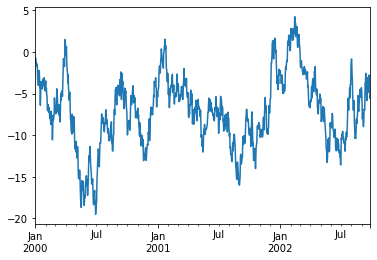

In [309]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

## On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

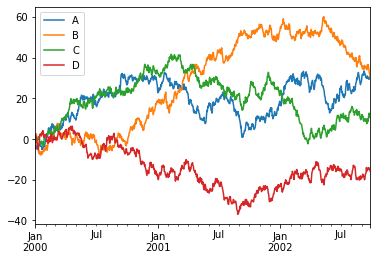

In [310]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

# 

# Getting data in/out

## CSV

### Writing to a csv file.

In [311]:
df.to_csv("foo.csv")

### Reading from a csv file.

In [312]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.897203,-0.252116,-1.964228,1.598618
1,2000-01-02,-4.806702,0.985535,-0.906542,1.610085
2,2000-01-03,-3.312658,1.974333,-0.592837,1.589728
3,2000-01-04,-3.669945,2.611663,-1.480874,0.835409
4,2000-01-05,-4.090344,1.133674,-1.353470,-0.707167
...,...,...,...,...,...
995,2002-09-22,29.846744,34.664748,12.562749,-14.198130
996,2002-09-23,29.401753,33.230768,12.718214,-15.008773
997,2002-09-24,30.027105,32.360946,11.714733,-14.641715
998,2002-09-25,30.677232,32.180690,12.372513,-14.358217


## HDF5

### Writing to a HDF5 Store.

In [313]:
df.to_hdf("foo.h5", "df")

### Reading from a HDF5 Store.

In [314]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.897203,-0.252116,-1.964228,1.598618
2000-01-02,-4.806702,0.985535,-0.906542,1.610085
2000-01-03,-3.312658,1.974333,-0.592837,1.589728
2000-01-04,-3.669945,2.611663,-1.480874,0.835409
2000-01-05,-4.090344,1.133674,-1.353470,-0.707167
...,...,...,...,...
2002-09-22,29.846744,34.664748,12.562749,-14.198130
2002-09-23,29.401753,33.230768,12.718214,-15.008773
2002-09-24,30.027105,32.360946,11.714733,-14.641715
2002-09-25,30.677232,32.180690,12.372513,-14.358217


## Excel

### Writing to an excel file.

In [315]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [316]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.897203,-0.252116,-1.964228,1.598618
1,2000-01-02,-4.806702,0.985535,-0.906542,1.610085
2,2000-01-03,-3.312658,1.974333,-0.592837,1.589728
3,2000-01-04,-3.669945,2.611663,-1.480874,0.835409
4,2000-01-05,-4.090344,1.133674,-1.353470,-0.707167
...,...,...,...,...,...
995,2002-09-22,29.846744,34.664748,12.562749,-14.198130
996,2002-09-23,29.401753,33.230768,12.718214,-15.008773
997,2002-09-24,30.027105,32.360946,11.714733,-14.641715
998,2002-09-25,30.677232,32.180690,12.372513,-14.358217


In [62]:
#Referece
#https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#